In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

*gender* - Whether the customer is a male or a female

*SeniorCitizen* - Whether the customer is a senior citizen or not (1, 0)

*Partner* - Whether the customer has a partner or not (Yes, No)

*Dependents* -Whether the customer has dependents or not (Yes, No)

*tenure* - Number of months the customer has stayed with the company

*PhoneService* - Whether the customer has a phone service or not (Yes, No)

*MultipleLines* - Whether the customer has multiple lines or not (Yes, No, No phone service)

*InternetService* - Customer’s internet service provider (DSL, Fiber optic, No)

*OnlineSecurity* - Whether the customer has online security or not (Yes, No, No internet service)

*OnlineBackup* - Whether the customer has online backup or not (Yes, No, No internet service)

*DeviceProtection* - Whether the customer has device protection or not (Yes, No, No internet service)

*TechSupport* - Whether the customer has tech support or not (Yes, No, No internet service)

*StreamingTV* - Whether the customer has streaming TV or not (Yes, No, No internet service)

*StreamingMovies* - Whether the customer has streaming movies or not (Yes, No, No internet service)

*Contract* - The contract term of the customer (Month-to-month, One year, Two year)

*PaperlessBilling* - Whether the customer has paperless billing or not (Yes, No)

*PaymentMethod* - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

*MonthlyCharges* - The amount charged to the customer monthly

*TotalCharges* - The total amount charged to the customer

*Churn* - Whether the customer churned or not (Yes or No)

In [6]:
for column in data.columns:
    if data[column].nunique() == 2:
        if "Yes" in data[column].unique():
            data[column] = data[column].replace(["Yes", "No"], [1,0])
        elif "Male" in data[column].unique():
            data[column] = data[column].replace(["Male", "Female"], [1,0])

D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [7]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
count,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,0.505,0.162,0.483,0.300,32.371,0.903,0.592,64.762,0.265
std,0.500,0.369,0.500,0.458,24.559,0.296,0.491,30.090,0.442
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.250,0.000
25%,0.000,0.000,0.000,0.000,9.000,1.000,0.000,35.500,0.000
50%,1.000,0.000,0.000,0.000,29.000,1.000,1.000,70.350,0.000
75%,1.000,0.000,1.000,1.000,55.000,1.000,1.000,89.850,1.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,118.750,1.000


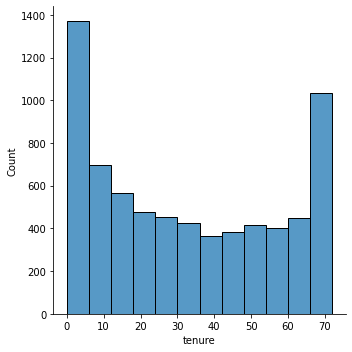

In [8]:
sns.displot(data["tenure"], bins=12)

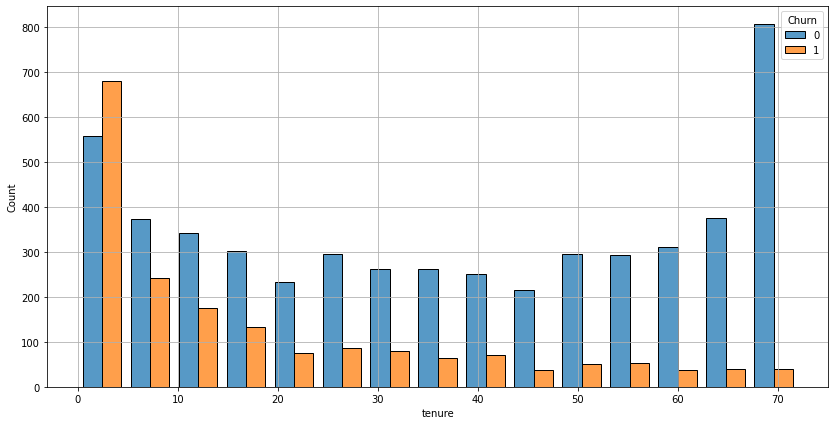

In [9]:
fig = plt.figure(figsize=(14,7))
sns.histplot(x = "tenure", data = data, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
plt.grid()

In [10]:
data[data["Churn"] == 1]["tenure"].describe()

count   1869.000
mean      17.979
std       19.531
min        1.000
25%        2.000
50%       10.000
75%       29.000
max       72.000
Name: tenure, dtype: float64

In [11]:
data[data["Churn"] == 0]["tenure"].describe()

count   5174.000
mean      37.570
std       24.114
min        0.000
25%       15.000
50%       38.000
75%       61.000
max       72.000
Name: tenure, dtype: float64

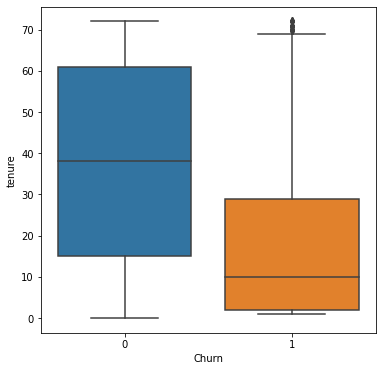

In [12]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = data["tenure"], x= data["Churn"])

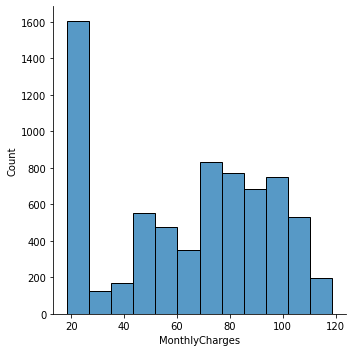

In [13]:
sns.displot(data["MonthlyCharges"], bins=12)

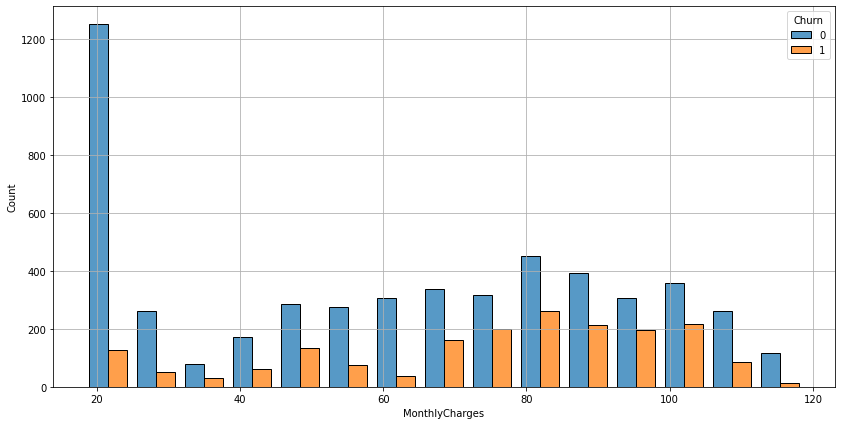

In [14]:
fig = plt.figure(figsize=(14,7))
sns.histplot(x = "MonthlyCharges", data = data, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
plt.grid()

In [15]:
data[data["Churn"] == 1]["MonthlyCharges"].describe()

count   1869.000
mean      74.441
std       24.666
min       18.850
25%       56.150
50%       79.650
75%       94.200
max      118.350
Name: MonthlyCharges, dtype: float64

In [16]:
data[data["Churn"] == 0]["MonthlyCharges"].describe()

count   5174.000
mean      61.265
std       31.093
min       18.250
25%       25.100
50%       64.425
75%       88.400
max      118.750
Name: MonthlyCharges, dtype: float64

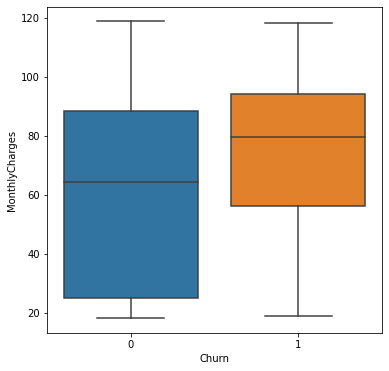

In [17]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = data["MonthlyCharges"], x= data["Churn"])

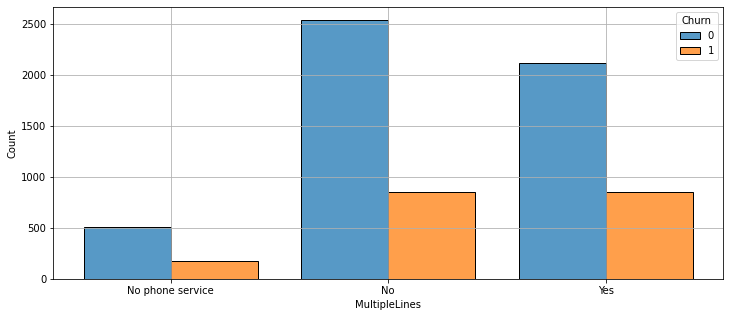

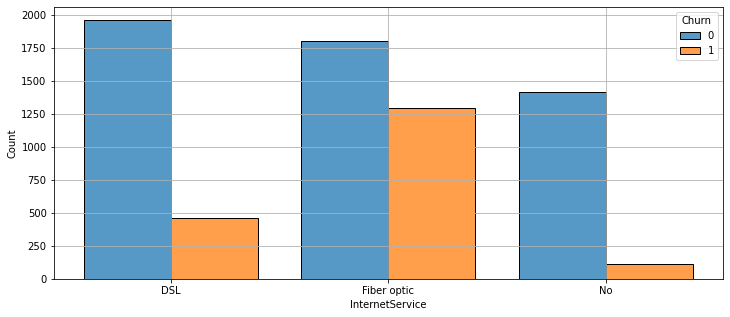

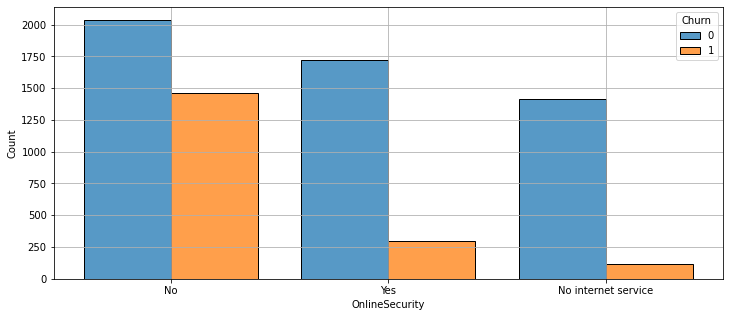

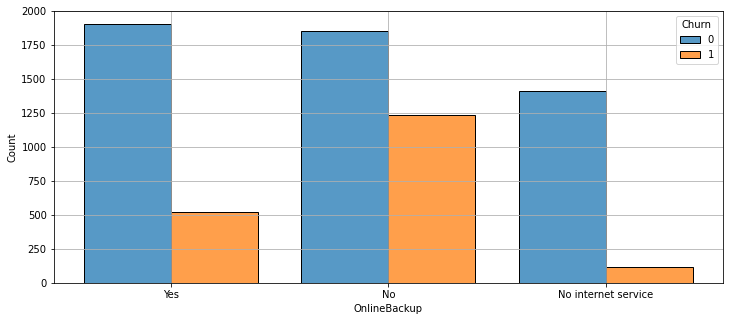

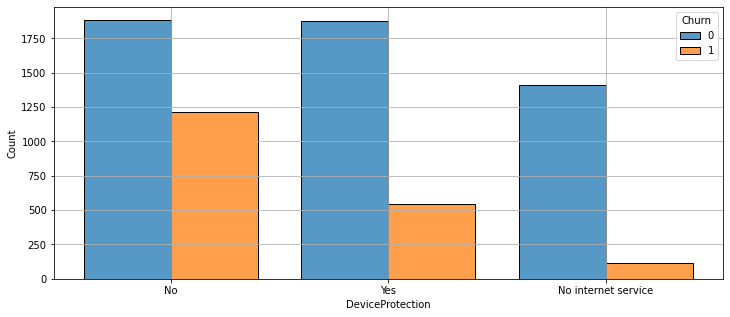

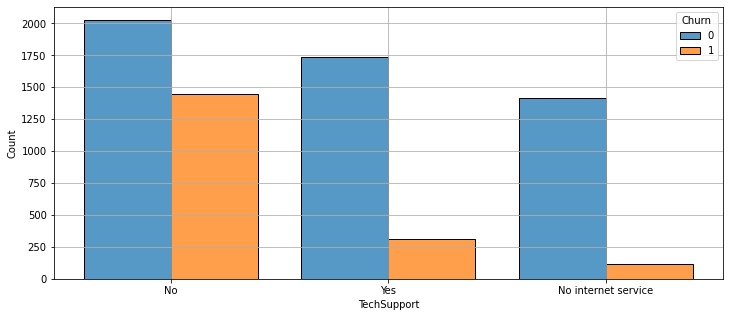

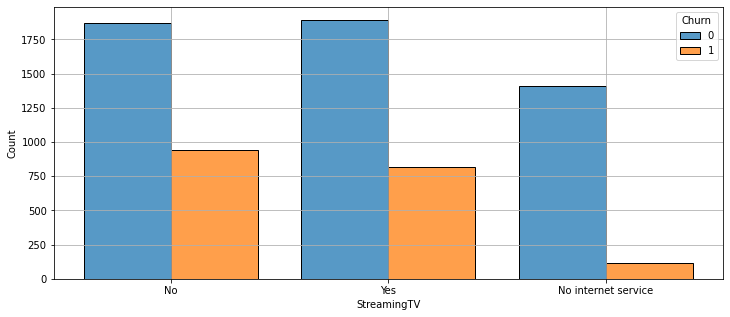

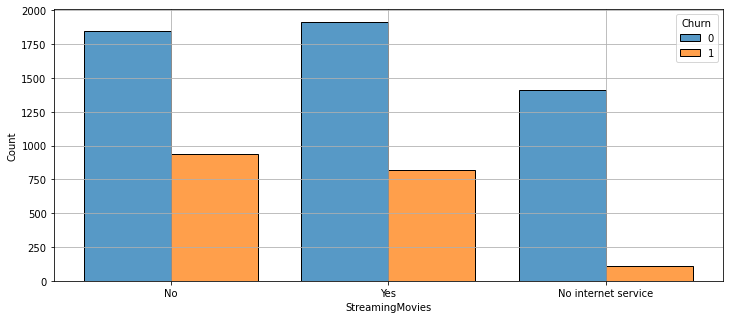

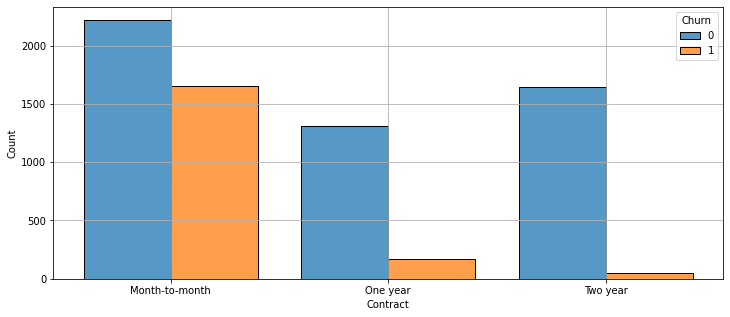

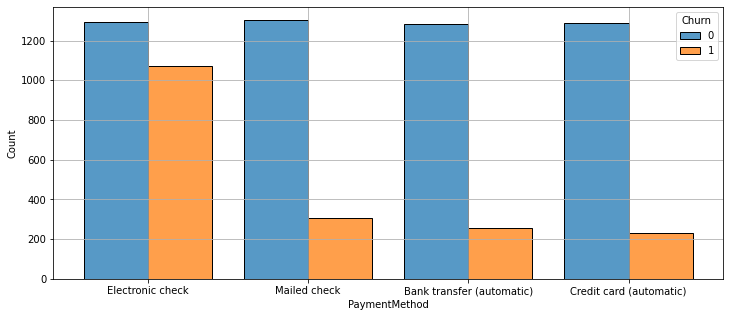

In [18]:
for column in data.columns.drop(["customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
                                 "tenure", "PhoneService", "PaperlessBilling", "MonthlyCharges", "TotalCharges"]):
    fig = plt.figure(figsize=(12,5))
    sns.histplot(data = data, x = column, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
    plt.grid()
    plt.show()

In [19]:
data.corr(method="spearman")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
gender,1.000,-0.002,-0.002,0.011,0.003,-0.006,-0.012,-0.014,-0.009
SeniorCitizen,-0.002,1.000,0.016,-0.211,0.019,0.009,0.157,0.221,0.151
Partner,-0.002,0.016,1.000,0.453,0.385,0.018,-0.015,0.108,-0.150
Dependents,0.011,-0.211,0.453,1.000,0.164,-0.002,-0.111,-0.107,-0.164
tenure,0.003,0.019,0.385,0.164,1.000,0.008,0.008,0.276,-0.367
PhoneService,-0.006,0.009,0.018,-0.002,0.008,1.000,0.017,0.240,0.012
PaperlessBilling,-0.012,0.157,-0.015,-0.111,0.008,0.017,1.000,0.346,0.192
MonthlyCharges,-0.014,0.221,0.108,-0.107,0.276,0.240,0.346,1.000,0.185
Churn,-0.009,0.151,-0.150,-0.164,-0.367,0.012,0.192,0.185,1.000


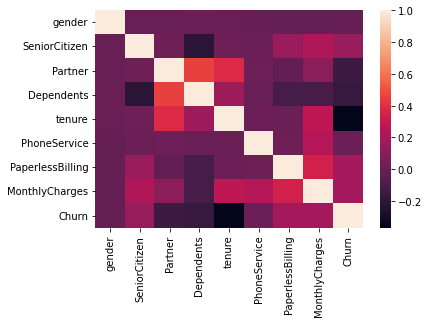

In [20]:
sns.heatmap(data.corr(method="spearman"))

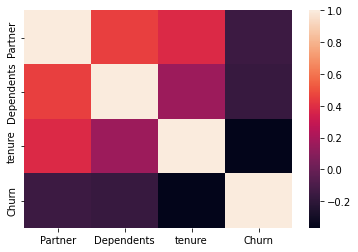

In [21]:
sns.heatmap(data[["Partner", "Dependents", "tenure", "Churn"]].corr(method="spearman"))

In [22]:
new_data = pd.get_dummies(data = data,
                          columns = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                                     "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"])

In [23]:
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.65,...,1,0,0,1,0,0,0,0,1,0


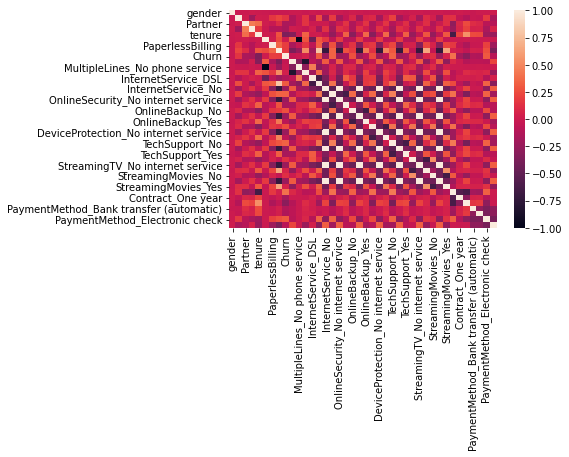

In [24]:
sns.heatmap(new_data.corr(method="spearman"))

In [41]:
min_corr = 0.25


correlations = {}
cdf = new_data.corr(method="spearman")["Churn"].reset_index()

for i, row in cdf.iterrows():
    if min_corr <= row[1]:
        correlations[row[0]] = round(row[1], 5)
        
correlations

{'Churn': 1.0,
 'InternetService_Fiber optic': 0.30802,
 'OnlineSecurity_No': 0.34264,
 'OnlineBackup_No': 0.26801,
 'DeviceProtection_No': 0.25248,
 'TechSupport_No': 0.33728,
 'Contract_Month-to-month': 0.4051,
 'PaymentMethod_Electronic check': 0.30192}

In [47]:
data_frame = new_data[correlations.keys()]
data_frame.head(10)

,Churn,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,Contract_Month-to-month,PaymentMethod_Electronic check
0,0,0,1,0,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,1,0
3,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,1,1
5,1,1,1,1,0,1,1,1
6,0,1,1,0,1,1,1,0
7,0,0,0,1,1,1,1,0
8,1,1,1,1,0,0,1,1
9,0,0,0,0,1,1,0,0


In [49]:
data_frame.to_csv("data.csv")